In [97]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import itertools 

In [98]:
Train = pd.read_csv('Train.csv')
SS = pd.read_csv('SampleSubmission.csv')
mc = pd.read_csv('monthly_cases.csv')
ac = pd.read_csv('annual_cases.csv')
dic = pd.read_csv('data_dictionary.csv')
prod = pd.read_csv('product.csv')
sd = pd.read_csv('service_delivery_site_data.csv')
content = pd.read_excel('Table_of_Contents.xlsx')
contra = pd.read_csv('contraceptive_case_data_annual.csv')

In [99]:
len(Train)

35753

In [100]:
Train.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0


In [101]:
Train.tail()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
35748,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS27133,0,50,25,0,25,8,0,25.0
35749,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS27138,150,0,0,0,150,0,0,0.0
35750,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS27132,1,10,4,0,7,13,0,0.0
35751,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS27134,8,0,8,0,0,10,0,0.0
35752,2016,7,LOH-DJIBOUA,GUITRY,C2055,AS17005,48,0,2,0,46,1,0,0.0


In [102]:
Train.product_code.value_counts()

AS27133    5368
AS27000    5259
AS27134    4708
AS27137    4449
AS27132    4436
AS27138    4060
AS27139    2347
AS46000    1981
AS42018    1550
AS17005    1248
AS21126     347
Name: product_code, dtype: int64

In [103]:
Train.site_code.value_counts()

C1015    416
C1087    413
C1030    405
C1055    404
C1112    398
        ... 
C3043     47
C2194     44
C1745     43
C1094     30
C1701     16
Name: site_code, Length: 155, dtype: int64

In [104]:
Train.product_code.unique()

array(['AS27134', 'AS27132', 'AS27000', 'AS27137', 'AS27138', 'AS27133',
       'AS21126', 'AS42018', 'AS46000', 'AS17005', 'AS27139'],
      dtype=object)

In [105]:
len(Train.site_code.unique())

155

In [106]:
Train[Train['product_code'] == 'AS21126'].sort_values(by = 'year', ascending = True)

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
31644,2016,2,PORO-TCHOLOGO-BAGOUE,KORHOGO,C3021,AS21126,0,0,0,0,0,0,0,0.0
6640,2018,12,ABIDJAN 2,ABOBO-EST,C1066,AS21126,0,0,0,0,0,0,0,0.0
6646,2018,12,ABIDJAN 2,ABOBO-EST,C1026,AS21126,0,0,0,0,0,0,0,0.0
6653,2018,12,ABIDJAN 2,ABOBO-EST,C1011,AS21126,0,0,0,0,0,0,0,10.0
6669,2018,12,ABIDJAN 2,ABOBO-EST,C1063,AS21126,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,2019,5,ABIDJAN 1-GRANDS PONTS,DABOU,C1088,AS21126,0,0,0,0,0,0,0,100.0
2161,2019,4,ABIDJAN 1-GRANDS PONTS,DABOU,C1088,AS21126,0,0,0,0,0,0,0,100.0
2106,2019,6,ABIDJAN 2,COCODY-BINGERVILLE,C1018,AS21126,0,0,0,0,0,0,0,50.0
2312,2019,4,N'ZI-IFOU-MORONOU,DAOUKRO,C4019,AS21126,0,0,0,0,0,0,0,0.0


In [107]:
# initializing list of list  
all_list = [['C4001', 'C4023', 'C1066', 'C1010', 'C1026', 'C1063', 'C1011',
       'C1008', 'C1679', 'C1082', 'C1051', 'C1413', 'C1059', 'C1106',
       'C1681', 'C1062', 'C1014', 'C1034', 'C1054', 'C4037', 'C1004',
       'C4014', 'C4061', 'C4015', 'C4038', 'C1093', 'C1083', 'C1084',
       'C5015', 'C2047', 'C4056', 'C5016', 'C5017', 'C2049', 'C4002',
       'C4017', 'C4054', 'C4016', 'C2002', 'C2011', 'C2010', 'C4018',
       'C3015', 'C3014', 'C3010', 'C1399', 'C1745', 'C1086', 'C1056',
       'C1055', 'C1018', 'C1029', 'C1144', 'C3011', 'C1088', 'C2003',
       'C5060', 'C5018', 'C4024', 'C4019', 'C2051', 'C2004', 'C2005',
       'C2016', 'C5019', 'C3012', 'C1089', 'C2017', 'C2053', 'C2006',
       'C2194', 'C1090', 'C1087', 'C1091', 'C2131', 'C5002', 'C2061',
       'C2056', 'C1092', 'C3013', 'C3021', 'C3018', 'C3016', 'C2127',
       'C3043', 'C5020', 'C1027', 'C1035', 'C1094', 'C1069', 'C1024',
       'C1030', 'C1101', 'C1015', 'C1058', 'C2059', 'C5001', 'C3017',
       'C4022', 'C5066', 'C4003', 'C3022', 'C3019', 'C5003', 'C5063',
       'C3020', 'C3001', 'C2060', 'C4025', 'C2062', 'C2007', 'C2214',
       'C1095', 'C2008', 'C2041', 'C1098', 'C2063', 'C1411', 'C2050',
       'C2015', 'C2064', 'C2066', 'C2168', 'C4021', 'C4020', 'C4026',
       'C3023', 'C1009', 'C1112', 'C2065', 'C1701', 'C2068', 'C5004',
       'C5021', 'C2052', 'C2057', 'C2069', 'C1072', 'C1061', 'C2070',
       'C2009', 'C1073', 'C1017', 'C1070', 'C1078', 'C1067', 'C1077',
       'C1028', 'C1099', 'C1007', 'C1074', 'C5006', 'C2071', 'C2055',
       'C1080'], ['AS27134', 'AS27132', 'AS27000', 'AS27137', 'AS27138', 'AS27133',
       'AS21126', 'AS42018', 'AS46000', 'AS17005', 'AS27139']]

In [108]:
# using itertools.product()   
# to compute all possible combinations 
res = list(itertools.product(*all_list))

In [109]:
# printing result 
print ("All possible combinations are : " +  str(res))

All possible combinations are : [('C4001', 'AS27134'), ('C4001', 'AS27132'), ('C4001', 'AS27000'), ('C4001', 'AS27137'), ('C4001', 'AS27138'), ('C4001', 'AS27133'), ('C4001', 'AS21126'), ('C4001', 'AS42018'), ('C4001', 'AS46000'), ('C4001', 'AS17005'), ('C4001', 'AS27139'), ('C4023', 'AS27134'), ('C4023', 'AS27132'), ('C4023', 'AS27000'), ('C4023', 'AS27137'), ('C4023', 'AS27138'), ('C4023', 'AS27133'), ('C4023', 'AS21126'), ('C4023', 'AS42018'), ('C4023', 'AS46000'), ('C4023', 'AS17005'), ('C4023', 'AS27139'), ('C1066', 'AS27134'), ('C1066', 'AS27132'), ('C1066', 'AS27000'), ('C1066', 'AS27137'), ('C1066', 'AS27138'), ('C1066', 'AS27133'), ('C1066', 'AS21126'), ('C1066', 'AS42018'), ('C1066', 'AS46000'), ('C1066', 'AS17005'), ('C1066', 'AS27139'), ('C1010', 'AS27134'), ('C1010', 'AS27132'), ('C1010', 'AS27000'), ('C1010', 'AS27137'), ('C1010', 'AS27138'), ('C1010', 'AS27133'), ('C1010', 'AS21126'), ('C1010', 'AS42018'), ('C1010', 'AS46000'), ('C1010', 'AS17005'), ('C1010', 'AS27139'),

In [110]:
len(res)

1705

In [111]:
C4001_AS27134 = Train[(Train['product_code'] == 'AS27134') & (Train['site_code'] == 'C4001')].sort_values(by = ['year', 'month'], ascending = True)

In [112]:
C4001_AS27134 

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
27728,2016,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,354,0,10,0,344,10,0,0.0
27735,2016,3,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,0,0,60,344,284,35,0,0.0
27743,2016,4,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,284,0,42,0,242,37,0,0.0
27768,2016,5,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,242,0,51,0,191,51,0,0.0
27781,2016,6,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,232,0,48,0,184,47,0,0.0
27804,2016,7,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,184,0,37,0,147,45,0,0.0
27770,2016,8,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,147,0,35,0,112,40,0,0.0
27789,2016,9,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,112,0,26,0,86,33,0,0.0
27796,2016,10,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,86,0,26,0,60,29,0,NaN
27751,2016,11,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,60,126,13,-26,147,22,0,0.0


In [113]:
Train[(Train['product_code'] == 'AS27132') & (Train['site_code'] == 'C4001')].sort_values(by = ['year', 'month'], ascending = True)

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
27723,2016,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,48,0,0,0,48,0,0,0.0
27734,2016,3,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,0,0,3,48,45,2,0,0.0
27742,2016,4,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,45,0,3,0,42,2,0,0.0
27764,2016,5,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,42,0,0,-28,14,2,0,0.0
27780,2016,6,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,14,0,0,0,14,1,0,0.0
27801,2016,7,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,14,0,0,-14,0,0,0,3.0
27774,2016,8,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,0,0,0,0,0,0,0,6.0
27788,2016,9,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,0,18,0,0,18,0,0,0.0
27795,2016,10,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,18,0,0,0,18,0,0,NaN
27747,2016,11,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,18,0,2,0,16,1,0,0.0


In [140]:
C4001_AS27132 = Train[(Train['product_code'] == 'AS27132') & (Train['site_code'] == 'C4001')].sort_values(by = ['year', 'month'], ascending = True)

In [114]:
Train[(Train['product_code'] == 'AS46000') & (Train['site_code'] == 'C1011')].sort_values(by = ['year', 'month'], ascending = True)

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
27825,2016,1,ABIDJAN 2,ABOBO-EST,C1011,AS46000,0,0,0,0,0,0,0,144.0
27844,2016,2,ABIDJAN 2,ABOBO-EST,C1011,AS46000,0,144,0,0,144,0,0,0.0
27872,2016,3,ABIDJAN 2,ABOBO-EST,C1011,AS46000,144,0,0,0,144,0,0,0.0
27893,2016,4,ABIDJAN 2,ABOBO-EST,C1011,AS46000,144,0,0,0,144,0,0,0.0
27966,2016,5,ABIDJAN 2,ABOBO-EST,C1011,AS46000,144,0,0,0,144,0,0,0.0
28025,2016,6,ABIDJAN 2,ABOBO-EST,C1011,AS46000,144,0,0,0,144,0,0,0.0
28105,2016,7,ABIDJAN 2,ABOBO-EST,C1011,AS46000,144,0,0,0,144,0,0,0.0
27992,2016,8,ABIDJAN 2,ABOBO-EST,C1011,AS46000,144,0,0,0,144,0,0,0.0
28039,2016,9,ABIDJAN 2,ABOBO-EST,C1011,AS46000,144,0,0,0,144,0,0,0.0
28088,2016,10,ABIDJAN 2,ABOBO-EST,C1011,AS46000,144,0,0,0,144,0,0,0.0


In [115]:
len(SS)

3089

In [116]:
#Sample Submission; lenth 3089
SS.head(20)

,ID,prediction
0,2019 X 7 X C4001 X AS21126,0
1,2019 X 7 X C4001 X AS27134,0
2,2019 X 7 X C4001 X AS27132,0
3,2019 X 7 X C4001 X AS27000,0
4,2019 X 7 X C4001 X AS27137,0
5,2019 X 7 X C4001 X AS27138,0
6,2019 X 7 X C4001 X AS27133,0
7,2019 X 7 X C4023 X AS27000,0
8,2019 X 7 X C4023 X AS27133,0
9,2019 X 8 X C4023 X AS27000,0


In [117]:
SS.tail()

,ID,prediction
3084,2019 X 9 X C5076 X AS27000,0
3085,2019 X 9 X C5076 X AS27139,0
3086,2019 X 9 X C5076 X AS27137,0
3087,2019 X 9 X C5076 X AS27138,0
3088,2019 X 9 X C5076 X AS27133,0


In [118]:
SS.ID.value_counts()

2019 X 7 X C1051 X AS21126    1
2019 X 9 X C1018 X AS27133    1
2019 X 8 X C2055 X AS27138    1
2019 X 9 X C3015 X AS27134    1
2019 X 7 X C2002 X AS27000    1
                             ..
2019 X 9 X C2062 X AS27137    1
2019 X 8 X C4021 X AS27137    1
2019 X 9 X C3043 X AS27137    1
2019 X 7 X C2053 X AS27133    1
2019 X 9 X C1004 X AS27138    1
Name: ID, Length: 3089, dtype: int64

mc = monthly_cases
ac = annual_cases
dic = data_dictionary
prod = product
sd = service_delivery_site_data
content = Table_of_Contents
contra = contraceptive_case_data_annual

In [119]:
#Monthly cases; length: 678
mc.head()

,district,month,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,...,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,1,2019,478.0,91.0,103.0,17.0,1278,296,195.0,...,NaN,319.0,33.0,1244.0,2846.0,NaN,422.0,NaN,1501.0,3466.0
1,ABENGOUROU,2,2019,340.0,81.0,126.0,10.0,1237,253,187.0,...,20.0,255.0,17.0,1174.0,2608.0,NaN,394.0,NaN,1535.0,3327.0
2,ABENGOUROU,3,2019,367.0,59.0,14.0,7.0,1300,224,147.0,...,50.0,214.0,50.0,1050.0,2148.0,NaN,340.0,NaN,1187.0,3636.0
3,ABENGOUROU,4,2019,583.0,46.0,6.0,1.0,1296,336,200.0,...,45.0,217.0,55.0,824.0,1787.0,NaN,340.0,NaN,889.0,2727.0
4,ABENGOUROU,5,2019,407.0,60.0,46.0,20.0,1356,281,156.0,...,14.0,321.0,256.0,1032.0,1635.0,NaN,355.0,NaN,604.0,1668.0


In [120]:
#Annual cases; length: 339
ac.head()

,Unnamed: 0,district,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,...,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,0,ABENGOUROU,2018,3298.0,965.0,2997.0,749.0,10892,2609,1867.0,...,673.0,2435.0,8799.0,12890.0,35961.0,NaN,3167.0,NaN,16041.0,48097.0
1,1,ABENGOUROU,2017,2597.0,698.0,2125.0,588.0,9939,2480,1835.0,...,544.0,1760.0,9920.0,12727.0,31260.0,NaN,2617.0,NaN,16403.0,41079.0
2,2,ABENGOUROU,2016,865.0,408.0,2616.0,786.0,8407,2440,2675.0,...,436.0,1503.0,11407.0,12666.0,28256.0,NaN,1671.0,NaN,8561.0,20878.0
3,3,ABOBO EST,2018,4041.0,2234.0,2200.0,583.0,13504,3940,2959.0,...,1154.0,3309.0,2241.0,9914.0,7426.0,NaN,3092.0,NaN,9359.0,9046.0
4,4,ABOBO EST,2017,1954.0,2491.0,1768.0,214.0,10745,2389,3506.0,...,2780.0,4009.0,5846.0,11784.0,13191.0,NaN,2596.0,NaN,6359.0,11711.0


In [121]:
dic

,File,Field,Description
0,contraceptive_logistics_data.csv,year,The year of the observation
1,contraceptive_logistics_data.csv,month,The month of the observation
2,contraceptive_logistics_data.csv,region,The higher level geographical area within Côte...
3,contraceptive_logistics_data.csv,district,The lower level geographical area within Côte ...
4,contraceptive_logistics_data.csv,site_code,The actual health service delivery site
5,contraceptive_logistics_data.csv,product_code,The unique identifier for each commodity
6,contraceptive_logistics_data.csv,stock_initial,Stock in hand of previous period. This is quan...
7,contraceptive_logistics_data.csv,stock_received,Total quantity received in last period. This i...
8,contraceptive_logistics_data.csv,stock_distributed*,Quantity dispensed/consumed in last reporting ...
9,contraceptive_logistics_data.csv,stock_adjustment,All kinds of losses/ adjustments made at the f...


In [122]:
prod

,product_code,product_type,product_name
0,AS17005,Female Condom,PRESERVATIF FEMININ UNITE
1,AS46000,Male Condom,PRESERVATIF MASCULIN BTE/144 BOITE
2,AS27139,Emergency Contraceptive (Pill),LEVONORGESTREL 1.5 MG CP BOITE
3,AS27137,Contraceptive Implant,JADELLE (IMPLANT + TROCARD) 150 µG BTE/10 BOITE
4,AS27138,Contraceptive Implant,IMPLANON IMPLANT 68 MG BTE/1 BOITE
5,AS21126,Injectable Contraceptive,MEDROXYPROGESTERONE 104MG/0.65ML INJ UNITE (SA...
6,AS27133,Injectable Contraceptive,DEPO PROVERA/PETOGEN 150 MG / 3ML INJ BTE/25 B...
7,AS27134,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
8,AS42018,Intrauterine Device (IUD),COPPER TCU 380 A (CUIVRE) UNITE
9,AS27000,Oral Contraceptive (Pill),MICROGYNON 0.03/0.15 MG BTE / 3 CYCLES BOITE


In [123]:
sd

,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,C1399,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352721,-3.940210
1,C4001,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,C1004,Hospital,AGNEBY-TIASSA-ME,AGBOVILLE,5.928340,-4.211450
3,C4002,Hospital,BOUNKANI-GONTOUGO,BONDOUKOU,8.041860,-2.798370
4,C2002,Hospital,MARAHOUE,BOUAFLE,6.984120,-5.751980
...,...,...,...,...,...,...
151,C2071,Hospital,MARAHOUE,ZUENOULA,7.425613,-6.050105
152,C1101,Hospital,ABIDJAN 2,KOUMASSI-PORT BOUET-VRIDI,5.264260,-3.985116
153,C1106,University Hospital/National Institute,ABIDJAN 1-GRANDS PONTS,ADJAME-PLATEAU-ATTECOUBE,5.340901,-4.026351
154,C1144,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352146,-3.883201


In [124]:
content

,file_type,file_name,file_description
0,dictionary,data_dictionary.csv,The definitions of variables found in primary ...
1,primary,contraceptive_logistics_data.csv,The data from the electronic logistics managem...
2,secondary,contraceptive_case_data_annual.csv,The data from the DHIS2 system that captures r...
3,secondary,contraceptive_case_data_monthly.csv,The data from the DHIS2 system that captures r...
4,secondary,service_delivery_site_data.csv,Additional information for health service deli...
5,secondary,product.csv,Additional information for contraceptive produ...
6,supplemental,Recommended Supplementary Data Sources,Suggested publicly available external datasets...
7,final,submission_format.csv,The final data file that competitors must subm...


In [125]:
contra

,district,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,...,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,2018,3298.0,965.0,2997.0,749.0,10892,2609,1867.0,425.0,...,673.0,2435.0,8799.0,12890.0,35961.0,NaN,3167.0,NaN,16041.0,48097.0
1,ABENGOUROU,2017,2597.0,698.0,2125.0,588.0,9939,2480,1835.0,400.0,...,544.0,1760.0,9920.0,12727.0,31260.0,NaN,2617.0,NaN,16403.0,41079.0
2,ABENGOUROU,2016,865.0,408.0,2616.0,786.0,8407,2440,2675.0,439.0,...,436.0,1503.0,11407.0,12666.0,28256.0,NaN,1671.0,NaN,8561.0,20878.0
3,ABOBO EST,2018,4041.0,2234.0,2200.0,583.0,13504,3940,2959.0,673.0,...,1154.0,3309.0,2241.0,9914.0,7426.0,NaN,3092.0,NaN,9359.0,9046.0
4,ABOBO EST,2017,1954.0,2491.0,1768.0,214.0,10745,2389,3506.0,679.0,...,2780.0,4009.0,5846.0,11784.0,13191.0,NaN,2596.0,NaN,6359.0,11711.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,ZOUKOUGBEU,2017,12.0,161.0,197.0,54.0,668,433,124.0,17.0,...,NaN,203.0,731.0,1471.0,713.0,NaN,324.0,NaN,4087.0,1122.0
335,ZOUKOUGBEU,2016,21.0,253.0,107.0,74.0,820,484,31.0,23.0,...,NaN,261.0,902.0,1825.0,935.0,NaN,70.0,NaN,998.0,204.0
336,ZUENOULA,2018,176.0,1441.0,424.0,145.0,3368,1826,638.0,396.0,...,38.0,1550.0,774.0,4188.0,7006.0,NaN,1560.0,NaN,2069.0,5471.0
337,ZUENOULA,2017,231.0,591.0,502.0,154.0,3677,1611,585.0,505.0,...,7.0,813.0,1342.0,4377.0,6177.0,NaN,977.0,NaN,2251.0,4270.0


In [142]:
#C4001_AS27132 = C4001_AS27132.to_csv(r'C:\Users\GETHSEMAN\Desktop\Contraceptive\C4001_AS27132.csv', index = None, header=True)

In [126]:
C4001_AS27134['day'] = 1
C4001_AS27134['Date'] = pd.to_datetime(C4001_AS27134 [["year", "month", 'day']])
C4001_AS27134 = C4001_AS27134[['Date', 'stock_distributed']]

In [127]:
C4001_AS27134.head()

,Date,stock_distributed
27728,2016-01-01,10
27735,2016-03-01,60
27743,2016-04-01,42
27768,2016-05-01,51
27781,2016-06-01,48


In [128]:
C4001_AS27134['Date'] = pd.to_datetime(C4001_AS27134['Date'] , format='%Y/%m/%d')
C4001_AS27134_ts = pd.Series(C4001_AS27134['stock_distributed'].values, index=C4001_AS27134['Date'], name='stock_distributed')
C4001_AS27134_ts.index = pd.DatetimeIndex(C4001_AS27134_ts .index, freq=C4001_AS27134_ts.index.inferred_freq)

C:\Users\GETHSEMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


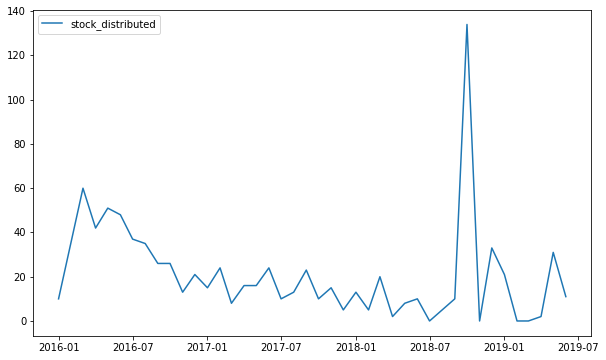

In [129]:
plt.figure(figsize=(10,6))
plt.plot(C4001_AS27134.set_index('Date'))
plt.legend(['stock_distributed'])